In [1]:
import duckboat as uck
import pandas as pd
import seaborn as sns

In [2]:
t = uck.Database(
    func = uck.Table('func.csv'),
    arr = uck.Table('arr.csv'),
).do(
    """
    SELECT *, 'func' AS algo FROM func
    UNION ALL
    SELECT *, 'arr' AS algo FROM arr
    """
)

In [3]:
t

┌───────────────┬──────────────┬─────────┐
│     name      │ microseconds │  algo   │
│    varchar    │    double    │ varchar │
├───────────────┼──────────────┼─────────┤
│ 2_8           │      209.664 │ func    │
│ 8_14          │      195.354 │ func    │
│ 8_14_null_2   │      170.134 │ func    │
│ 8_14_null_10  │      202.087 │ func    │
│ 8_14_null_100 │      199.787 │ func    │
│ 2_8           │      195.437 │ func    │
│ 8_14          │      197.466 │ func    │
│ 8_14_null_2   │      169.883 │ func    │
│ 8_14_null_10  │      202.142 │ func    │
│ 8_14_null_100 │      202.415 │ func    │
│  ·            │         ·    │  ·      │
│  ·            │         ·    │  ·      │
│  ·            │         ·    │  ·      │
│ 2_8           │      156.212 │ arr     │
│ 8_14          │      155.966 │ arr     │
│ 8_14_null_2   │      155.931 │ arr     │
│ 8_14_null_10  │      169.543 │ arr     │
│ 8_14_null_100 │       160.45 │ arr     │
│ 2_8           │      155.916 │ arr     │
│ 8_14     

In [4]:
df = t.do(
    "WHERE name = '8_14_null_100'",
    "pandas"
)

In [5]:
df

,name,microseconds,algo
0,8_14_null_100,199.787,func
1,8_14_null_100,202.415,func
2,8_14_null_100,205.850,func
3,8_14_null_100,205.265,func
4,8_14_null_100,205.928,func
...,...,...,...
995,8_14_null_100,160.348,arr
996,8_14_null_100,160.248,arr
997,8_14_null_100,160.213,arr
998,8_14_null_100,160.450,arr


<Axes: xlabel='microseconds', ylabel='Density'>

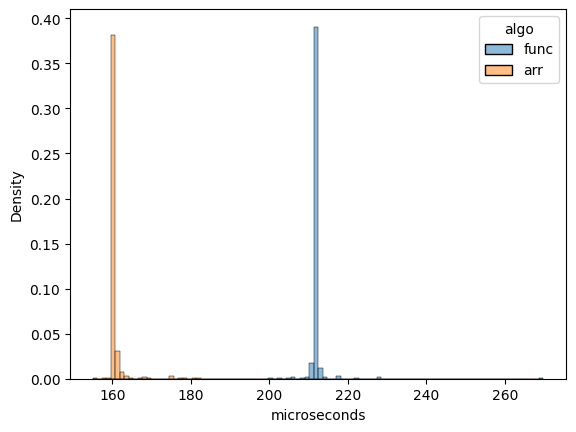

In [8]:
sns.histplot(df, x='microseconds', hue='algo', bins=100, multiple='layer', stat="density")